### Import module

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import gradient_maker as gm
#from gradient_maker import gm.grad_brite

### The code cells below demonstrate how routines in the `gradient_maker` module work.

In [4]:
# Besides `grad_brite`, there are several auxiliary routines included:

# `rgb_to_hex` converts a list or tuple of R, G & B values (0-255 scale) to a hexadecimal value, dropping any alpha values.
x1 = gm.rgb_to_hex([255,204,51])
x2 = gm.rgb_to_hex((255,204,51))
x3 = gm.rgb_to_hex(np.array([255,204,51,50]))
print("rgb_to_hex:",x1,x2,x3)

# `hex_to_rgb` converts a hexadecimal RRGGBB value to a tuple of integers (0-255 scale), dropping any alpha values.
i1 = gm.hex_to_rgb("#e5c4b3")
i2 = gm.hex_to_rgb("E5C4B3")
i3 = gm.hex_to_rgb("#E5C4B3FF")
print("hex_to_rgb:",i1,i2,i3)

# `rgb_to_dec` converts a list or tuple of R, G & B values from the 0-255 scale to a floating point list on a 0-1 scale, dropping any alpha values.
d1 = gm.rgb_to_dec([30,98,56])
d2 = gm.rgb_to_dec([30,98,56,100])
print("rgb_to_dec:",d1,d2)

# `dec_to_rgb` converts a list or tuple of R, G & B values from floating point (0-1) scale to a list on a 0-255 scale, dropping any alpha values.
r1 = gm.dec_to_rgb([0.25,0.5,1])
r2 = gm.dec_to_rgb((0.3333,0.75,0.875,1.0))
print("dec_to_rgb:",r1,r2)

rgb_to_hex: #ffcc33 #ffcc33 #ffcc33
hex_to_rgb: (229, 196, 179) (229, 196, 179) (229, 196, 179)
rgb_to_dec: [0.11764705882352941, 0.3843137254901961, 0.2196078431372549] [0.11764705882352941, 0.3843137254901961, 0.2196078431372549]
dec_to_rgb: [64, 128, 255] [85, 191, 223]


[None, None, None, None, None, None, None]

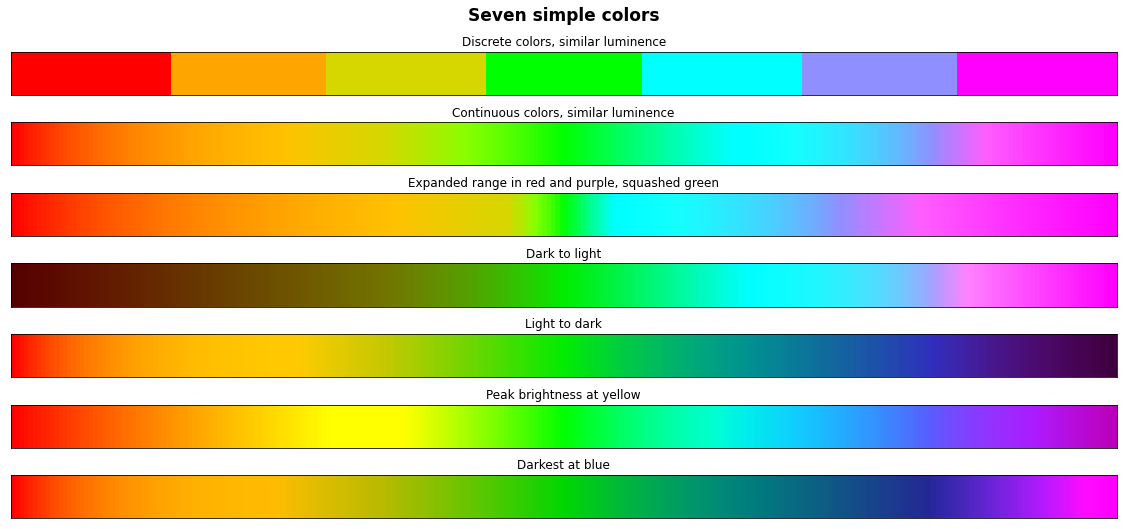

In [43]:
# `grad_brite` itself can take as input any number of colors in hexadecimal format as input:
hex_in = ["#FF0000","#FF8800","#FFFF00","#00FF00","#00FFFF","#4040FF","#FF00FF"]

#############################################################################################
c_discrete = gm.grad_brite(hex_in,ncol=7,lite_0=0.75,lite_1=0.75)
c_smooth = gm.grad_brite(hex_in,lite_0=0.75,lite_1=0.75)
c_expanded = gm.grad_brite(hex_in,pcol=[0,0.25,0.45,0.5,0.55,0.75,1],lite_0=0.75,lite_1=0.75)
c_dark2light = gm.grad_brite(hex_in,lite_0=0.1,lite_1=1.0)
c_light2dark = gm.grad_brite(hex_in,lite_0=1.0,lite_1=0.1)
c_yellow_peak = gm.grad_brite(hex_in,lite_0=0.5,lite_1=0.3,mid_lite=1.0,mid_spot=0.333)
c_blue_dark = gm.grad_brite(hex_in,lite_0=0.95,lite_1=0.5,mid_lite=0.2,mid_spot=0.833)
#############################################################################################

z = [np.linspace(0,1,256)]*10
fig, ax = plt.subplots(7,1,figsize=(16,7.5))
ax.flatten()
plt.subplots_adjust(wspace=0.0,hspace=0.04,left=0.02, right=0.98, bottom=0.01, top=0.92)
fig.suptitle("Seven simple colors",fontweight="bold",fontsize=17)

ax[0].imshow(z, cmap=c_discrete)
ax[1].imshow(z, cmap=c_smooth)
ax[2].imshow(z, cmap=c_expanded)
ax[3].imshow(z, cmap=c_dark2light)
ax[4].imshow(z, cmap=c_light2dark)
ax[5].imshow(z, cmap=c_yellow_peak)
ax[6].imshow(z, cmap=c_blue_dark)

ax[0].set_title("Discrete colors, similar luminence")
ax[1].set_title("Continuous colors, similar luminence")
ax[2].set_title("Expanded range in red and purple, squashed green")
ax[3].set_title("Dark to light")
ax[4].set_title("Light to dark")
ax[5].set_title("Peak brightness at yellow")
ax[6].set_title("Darkest at blue")

[ax[i].yaxis.set_major_locator(plt.NullLocator()) for i in range(7)] # remove y axis ticks
[ax[i].xaxis.set_major_locator(plt.NullLocator()) for i in range(7)] # remove x axis ticks


### The code cells below demonstrate application of `grad_brite` to generate various color maps.

In [44]:
#############################################################################################
### Various scales from GrADS...

# The classic rainbow color scale from GrADS (http://cola.gmu.edu/grads/gadoc/colorcontrol.html)
d_grads = [[160,0,200],[130,0,220],[30,60,255],[0,160,255],[0,200,200],[0,210,140],[0,220,0],[160,230,50],[230,220,50],[230,175,45],[240,130,40],[250,60,60],[240,0,130]]
# Slight adjustment to brightness gradient, keeps 13 discrete colors
lite_0=0.25; lite_1=0.30
mid_lite = 0.88; mid_spot=0.65 
hexes = [gm.rgb_to_hex(d_grads[i]) for i in range(len(d_grads))]
ncol = 13
c_grads = gm.grad_brite(hexes,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

#     Rainbow color scale from GrADS rendered as a continuous scale
lite_0=0.25; lite_1=0.30     
mid_lite = 0.88; mid_spot=0.65  
hexes = [gm.rgb_to_hex(d_grads[i]) for i in range(len(d_grads))]
ncol = 256
c_cgrads = gm.grad_brite(hexes,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

#     Blue-white-red color scale from GrADS (http://cola.gmu.edu/grads/gadoc/colorcontrol.html) as a continuous scale
d_grads = [[0,0,255],[220,220,255],[255,255,255],[255,220,220],[255,0,0]]
p_grads = [0.0, 0.41, 0.50, 0.59, 1.0] 
lite_0=0.11; lite_1=0.30    
mid_lite = 1.00; mid_spot=0.50 
hexes = [gm.rgb_to_hex(d_grads[i]) for i in range(len(d_grads))]
ncol = 256
c_bwrgrads = gm.grad_brite(hexes,pcol=p_grads,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

#     GrADS blue-white-red color scale with brightnesses reversed (i.e., blue deep-violet red)
d_grads = [[200,200,255],[20,20,192],[96,0,128],[255,0,0],[255,200,200]]
p_grads = [0.0, 0.45, 0.50, 0.55, 1.0] 
lite_0=0.90; lite_1=0.90             
mid_lite = 0.10; mid_spot=0.50 
ncol = 256
c_bkr = gm.grad_brite([gm.rgb_to_hex(d_grads[i]) for i in range(len(d_grads))],pcol=p_grads,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)


#############################################################################################
### Various monotonic scales...

# Monotonic scale light to dark, bluish to greenish, a bit icy 
x_icy = ['#FFF7FB', '#D1D2E6', '#56A9CD', '#007E89', '#00695A'] 
p_icy = [0.0, 0.25, 0.50, 0.75, 1.0] 
lite_0=0.99; lite_1=0.10   
mid_lite = 0.6; mid_spot=0.5   
ncol = 256
c_icy = gm.grad_brite(x_icy,pcol=p_icy,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, aqua to purple-blue
x_beachy = ['#50635A', '#8188F6', '#FF87BB'] 
p_beachy = [0.0, 0.70, 1.0]  
lite_0=0.99; lite_1=0.10  
mid_lite = 0.5; mid_spot=0.5  
ncol = 256
c_beachy = gm.grad_brite(x_beachy,pcol=p_beachy,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, reddish scale 
x_toasty = ['#FFF6C0', '#ef3018', '#6C2610']
p_toasty = [0.0, 0.50, 1.0] 
lite_0=0.99; lite_1=0.10    
mid_lite = 0.5; mid_spot=0.5  
ncol = 256
c_toasty = gm.grad_brite(x_toasty,pcol=p_toasty,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, rather like skin tones
x_fleshy = ['#ffd8e0','#f48a6f','#704401'] 
p_fleshy = [0.0, 0.50, 1.0]  
lite_0=0.99; lite_1=0.10  
mid_lite = 0.5; mid_spot=0.5  
ncol = 256
c_fleshy = gm.grad_brite(x_fleshy,pcol=p_fleshy,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, like an avocado
x_guacky = ['#ffffac','#538e14','#1a3f11','#54402a'] 
p_guacky = [0.0, 0.35, 0.70, 1.0]    
lite_0=0.99; lite_1=0.20    
mid_lite = 0.5; mid_spot=0.5 
ncol = 256
c_guacky = gm.grad_brite(x_guacky,pcol=p_guacky,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, like vegetation gradients seen from space
x_leafy = ['#E7DFD4', '#CEBBA9', '#61BE68', '#3C653F'] 
p_leafy = [0.0, 0.3, 0.55, 1.0] 
lite_0=0.97; lite_1=0.15   
mid_lite = 0.55; mid_spot=0.5 
ncol = 256
c_leafy = gm.grad_brite(x_leafy,pcol=p_leafy,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, oranges and browns
x_woody = ['#fafad6','#b3642f','#87502E','#4a002c']
p_woody = [0.0, 0.2, 0.7, 1.0]   
lite_0=0.97; lite_1=0.10   
mid_lite = 0.55; mid_spot=0.5 
ncol = 256
c_woody = gm.grad_brite(x_woody,pcol=p_woody,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Monotonic scale light to dark, sunset to twilight
x_dusky = ['#ffe5cb','#d997ba','#7c5089','#0d0026'] 
p_dusky = [0.0, 0.2, 0.5, 1.0]  
lite_0=0.97; lite_1=0.10   
mid_lite = 0.55; mid_spot=0.5  
ncol = 256
c_dusky = gm.grad_brite(x_dusky,pcol=p_dusky,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Guo et al. (2006; https://doi.org/10.1175/JHM511.1)
# Linear scale - GLACE coupling metric; slightly greenish start, then yellow-orange-brown
x_glace = ['#FFFFFF', '#D9DD76', '#E8CC3E', '#D5883A', '#C1462E', '#8A3729'] 
p_glace = [0.0, 0.12, 0.25, 0.625, 0.875, 1.0] 
lite_0=1.00; lite_1=0.30     
mid_lite = 0.25; mid_spot=0.9 
ncol = 256
c_glace = gm.grad_brite(x_glace,pcol=p_glace,lite_0=lite_0,lite_1=lite_1,ncol=ncol)

#############################################################################################
### Various divergent scales...

# Color scale based on Koster et al. (2010; https://doi.org/10.1029/2009GL041677)
# Randy's IDL color scheme for forecast skill
x_koster = ['#0336CE', '#74FBFD', '#e6e6e6', '#e6e6e6','#F7F952', '#C1281B'] 
p_koster = [0.0, 0.45, 0.451, 0.549, 0.55, 1.0]  
lite_0=0.22; lite_1=0.22    
mid_lite = 0.96; mid_spot=0.5  
ncol = 256
c_koster = gm.grad_brite(x_koster,pcol=p_koster,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer et al. (2013; https://doi.org/10.1175/JHM-D-12-0107.1)
# Divergent scale, used to indicate degree of CMIP model consensus in the sign of climate changes
x_cmip = ['#00153F', '#435FA5', '#E0E0EC', '#D0D3D3', '#F6E1DF', '#DA483D', '#8A2A2B'] 
p_cmip = [0.0, 0.12, 0.49, 0.50, 0.51, 0.88, 1.0]  
lite_0=0.10; lite_1=0.15     
mid_lite = 0.94; mid_spot=0.50  
ncol = 256
c_cmip = gm.grad_brite(x_cmip,pcol=p_cmip,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scales from Badger & Dirmeyer (2015; https://doi.org/10.5194/hess-19-4547-2015)
#     Simple divergent redish-bluish color scale, light in the middle
x_badger = ['#993404', '#FEE391', '#D0D1E6', '#045A8D']
p_badger = [0.0, 0.496, 0.504, 1.0]  
lite_0=0.30; lite_1=0.30    
mid_lite = 0.95; mid_spot=0.5 
ncol = 256
c_badger = gm.grad_brite(x_badger,pcol=p_badger,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)
#     Simple divergent greenish-bluish color scale, NOT GOOD FOR TRITANOPIA
x_badger = ['#00441B', '#CCECE6', '#D0D1E6', '#045A8D'] 
p_badger = [0.0, 0.496, 0.504, 1.0] 
lite_0=0.30; lite_1=0.30    
mid_lite = 0.95; mid_spot=0.5   
ncol = 256
c_badger2 = gm.grad_brite(x_badger,pcol=p_badger,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)
#     Simple divergent redish-greenish color scale, NOT GOOD FOR PROTANOPIA, DEUTERANOPIA
x_badger = ['#993404', '#FEE391', '#CCECE6', '#00441B']
p_badger = [0.0, 0.496, 0.504, 1.0] 
lite_0=0.30; lite_1=0.30   
mid_lite = 0.95; mid_spot=0.5  
ncol = 256
c_badger3 = gm.grad_brite(x_badger,pcol=p_badger,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer (2013; https://doi.org/10.1007/s00382-013-1866-x)
# Divergent scale for hydrologic applications (e.g., soil moisture, dry to normal to wet)
x_hydro = ['#582510', '#EBCC90', '#FDF3C3', '#DDFCD2', '#7CB8A0', '#1E3B58'] 
p_hydro = [0.0, 0.25, 0.42, 0.58, 0.75, 1.0] 
lite_0=0.20; lite_1=0.20    
mid_lite = 1.0; mid_spot=0.5 
ncol = 256
c_hydro = gm.grad_brite(x_hydro,pcol=p_hydro,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer et al. (2013; https://doi.org/10.1175/JCLI-D-13-00029.1)
# Divergent scale, greenish middle, ends tail into other colors
x_isi = ['#642B80', '#372D81', '#B1CDEA', '#ECfCEC', '#F3EA85', '#D44435', '#882018'] 
p_isi = [0.0, 0.12, 0.46, 0.50, 0.54, 0.88, 1.0]   
lite_0=0.25; lite_1=0.25     
mid_lite = 0.99; mid_spot=0.50   
ncol = 256
c_isi = gm.grad_brite(x_isi,pcol=p_isi,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer & Kinter (2010; https://doi.org/0.1175/2010JHM1196.1)
# Divergent scale, dry normal wet, water vapor transport anomalies
x_maya = ['#8B241C', '#756650', '#CDC5B5', '#BBc9cE', '#31569F', '#893C8C'] 
p_maya = [0.0, 0.08, 0.42, 0.58, 0.90, 1.0]    
lite_0=0.25; lite_1=0.25       
mid_lite = 0.97; mid_spot=0.5  
ncol = 256
c_maya = gm.grad_brite(x_maya,pcol=p_maya,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer et al. (2011; https://doi.org/10.1007/s00382-011-1127-9)
# Divergent scale, very similar to DEUTERANOPIA vision
x_athena = ['#6F4E19', '#6F4E19', '#DDDDDD', '#ABAFF6', '#3940AD', '#382074'] 
p_athena = [0.0, 0.48, 0.52, 0.61, 0.89, 1.0]  
lite_0=0.25; lite_1=0.25     
mid_lite = 0.99; mid_spot=0.50  
ncol = 256
c_athena = gm.grad_brite(x_athena,pcol=p_athena,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Kumar et al. (2013; https://doi.org/10.1175/JCLI-D-12-00535.1)
# Sanjiv was very fond of the purple to pomogranate scale
x_kumar = ['#512C7A', '#D7C6DD', '#FAF2CA', '#F4B14F', '#dB4C3C'] 
p_kumar = [0.0, 0.499, 0.501, 0.80, 1.0]    
lite_0=0.24; lite_1=0.48     
mid_lite = 0.96; mid_spot=0.5  
ncol = 256
c_kumar = gm.grad_brite(x_kumar,pcol=p_kumar,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

#############################################################################################
### Various tailed scales...

# Color scale for water vapor back trajectory sources
# From Dirmeyer & Brubaker (2007; https://doi.org/10.1175/JHM557.1)
#     Light to dark, with a small lighter tail on the very high end
x_brubaker = ['#F7F8D6', '#ACD1BD', '#52ACC6', '#2F4C9C', '#7E4F9B', '#A67BB0'] # Original color sequence (hex)
p_brubaker = [0.0, 0.25, 0.50, 0.75, 0.875, 1.0]   
lite_0=0.96; lite_1=0.7   
mid_lite = 0.2; mid_spot=0.9 
ncol = 256
c_brubaker = gm.grad_brite(x_brubaker,pcol=p_brubaker,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on Dirmeyer et al. (2018; https://doi.org/10.1029/2018JD029103)
# Linear scale - harvested predictability - like Brubaker, light tail
x_halder = ['#E6E6E6', '#F3F692', '#5FCDAC', '#3460B4', '#704387', '#B4264A']
p_halder = [0.0, 0.12, 0.60, 0.82, 0.93, 1.0]    
lite_0=0.98; lite_1=0.45  
mid_lite = 0.25; mid_spot=0.9  
ncol = 256
c_halder = gm.grad_brite(x_halder,pcol=p_halder,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

# Color scale based on many papers of two-legged land-atmosphere coupling metrics 
# Green-yellow-red for feedback coupling, blues to purples for negative values (no feedbacks)
x_loco = ['#523C7D', '#434C88', '#50B5DC', '#CAE1D6', '#E5DD5D', '#E7AE52', '#CC5042', '#85243D'] 
p_loco = [0.0, 0.05, 0.20, 0.30, 0.35, 0.55, 0.75, 1.0]  
lite_0=0.40; lite_1=0.20   
mid_lite = 0.96; mid_spot=0.3  
ncol = 256
c_loco = gm.grad_brite(x_loco,pcol=p_loco,lite_0=lite_0,lite_1=lite_1,mid_lite=mid_lite,mid_spot=mid_spot,ncol=ncol)

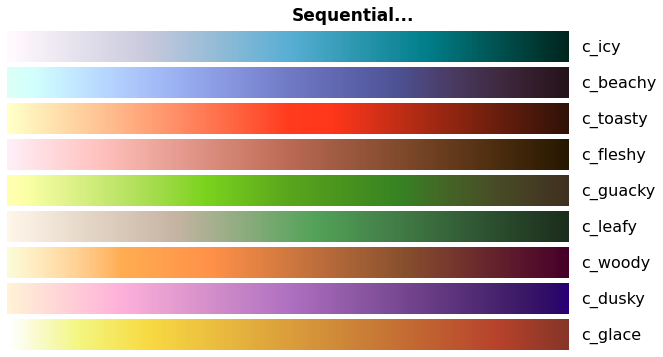

In [45]:
# Make an image to display sequential examples
zx = 256; zy = 14
z = [np.linspace(0,1,zx)] * zy

# Sequential
bands = ['c_icy','c_beachy','c_toasty','c_fleshy','c_guacky','c_leafy','c_woody','c_dusky','c_glace']

fig, axs = plt.subplots(len(bands),1,figsize=(10,(len(bands)+1)*0.5))
plt.subplots_adjust(wspace=0.0,hspace=0.0,left=0.02, right=0.8, bottom=0.02, top=0.92)
fig.suptitle("Sequential...",fontweight="bold",fontsize=17)
c_n = 16
c_rot = -0.5
for b in range(len(bands)):
    axs[b].imshow(z,cmap=eval(bands[b]))
    axs[b].text(zx*1.02,zy/2.0,bands[b],ha='left',va='center',fontsize=16)
    axs[b].axis('off')
#fig.savefig("ggb_sequential.jpg",dpi=72) 

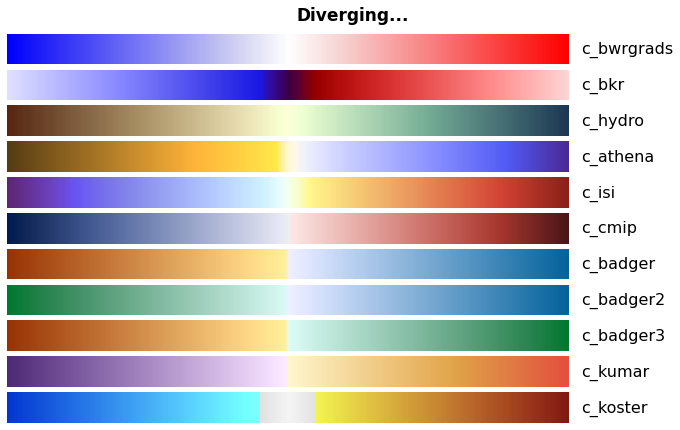

In [47]:
# Make an image to display diverging examples
zx = 256; zy = 14
z = [np.linspace(0,1,zx)] * zy

# Divergent
bands = ['c_bwrgrads','c_bkr','c_hydro','c_athena','c_isi','c_cmip','c_badger','c_badger2','c_badger3','c_kumar','c_koster']

fig, axs = plt.subplots(len(bands),1,figsize=(10,len(bands)*0.55))
plt.subplots_adjust(wspace=0.0,hspace=0.0,left=0.02, right=0.8, bottom=0.02, top=0.925)
fig.suptitle("Diverging...",fontweight="bold",fontsize=17)
c_n = 16
c_rot = -0.5
for b in range(len(bands)):
    axs[b].imshow(z,cmap=eval(bands[b]))
    axs[b].text(zx*1.02,zy/2.0,bands[b],ha='left',va='center',fontsize=16)
    axs[b].axis('off')
fig.savefig("ggb_diverging.jpg",dpi=72) 

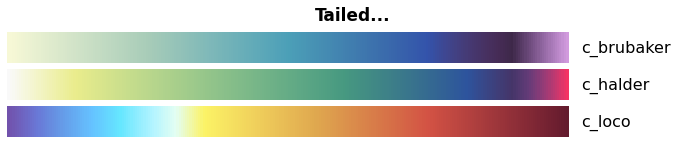

In [48]:
# Make an image to display tailed examples
zx = 256; zy = 14
z = [np.linspace(0,1,zx)] * zy

# Divergent
bands = ['c_brubaker','c_halder','c_loco']

fig, axs = plt.subplots(len(bands),1,figsize=(10,(len(bands)+1)*0.48))
plt.subplots_adjust(wspace=0.0,hspace=0.0,left=0.02, right=0.8, bottom=0.02, top=0.82)
fig.suptitle("Tailed...",fontweight="bold",fontsize=17)
c_n = 16
c_rot = -0.5
for b in range(len(bands)):
    axs[b].imshow(z,cmap=eval(bands[b]))
    axs[b].text(zx*1.02,zy/2.0,bands[b],ha='left',va='center',fontsize=16)
    axs[b].axis('off')
fig.savefig("ggb_tailed.jpg",dpi=72) 

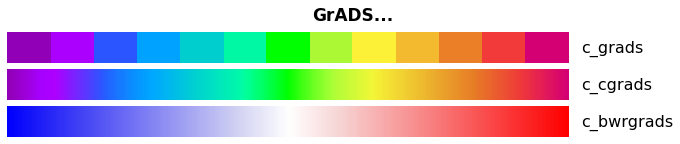

In [50]:
# Make an image to display GrADS examples
zx = 256; zy = 14
z = [np.linspace(0,1,zx)] * zy

# Divergent
bands = ['c_grads','c_cgrads','c_bwrgrads']

fig, axs = plt.subplots(len(bands),1,figsize=(10,(len(bands)+1)*0.48))
plt.subplots_adjust(wspace=0.0,hspace=0.0,left=0.02, right=0.8, bottom=0.02, top=0.82)
fig.suptitle("GrADS...",fontweight="bold",fontsize=17)
c_n = 16
c_rot = -0.5
for b in range(len(bands)):
    axs[b].imshow(z,cmap=eval(bands[b]))
    axs[b].text(zx*1.02,zy/2.0,bands[b],ha='left',va='center',fontsize=16)
    axs[b].axis('off')
fig.savefig("ggb_grads.jpg",dpi=72) 